In [1]:
import numpy as np
import pandas as pd
import torch
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import seaborn as sns
from tqdm import tqdm
from torchvision import transforms
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2
from skimage import io

/home/boris/Documents/kaggle cassava/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [184]:
from cassava.transforms import get_train_transforms, get_test_transforms
from cassava.utils import *

In [3]:
%matplotlib inline

In [25]:
train_images_torch = context.catalog.load('train_images_torch')

2020-12-08 13:48:38,032 - kedro.io.data_catalog - INFO - Loading data from `train_images_torch` (ImageFolderDataSet)...


In [77]:
raw_transforms = A.Compose([
        A.ToFloat(max_value=1.0),
        A.Resize(256, 256),
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2(),
])

In [595]:
def get_train_transforms():
    return A.Compose([
        A.HueSaturationValue(hue_shift_limit=5, sat_shift_limit=5, val_shift_limit=5, p=1),
        A.ToFloat(max_value=1.0),
        A.RandomResizedCrop(256, 256, scale=(0.3, 0.9)),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2(),
    ])

In [596]:
def get_test_transforms():
    return A.Compose([
        A.ToFloat(max_value=1.0),
        A.Resize(400, 400),
        A.CenterCrop(256, 256),
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2(),
    ])

In [597]:
aug_transforms = get_train_transforms()
aug_transforms

Compose([
  HueSaturationValue(always_apply=False, p=1, hue_shift_limit=(-5, 5), sat_shift_limit=(-5, 5), val_shift_limit=(-5, 5)),
  ToFloat(always_apply=False, p=1.0, max_value=1.0),
  RandomResizedCrop(always_apply=False, p=1.0, height=256, width=256, scale=(0.3, 0.9), ratio=(0.75, 1.3333333333333333), interpolation=1),
  HorizontalFlip(always_apply=False, p=0.5),
  VerticalFlip(always_apply=False, p=0.5),
  Normalize(always_apply=False, p=1.0, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], max_pixel_value=255.0),
  ToTensorV2(always_apply=True, p=1.0, transpose_mask=False),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})

In [598]:
test_transforms = get_test_transforms()
test_transforms

Compose([
  ToFloat(always_apply=False, p=1.0, max_value=1.0),
  Resize(always_apply=False, p=1, height=400, width=400, interpolation=1),
  CenterCrop(always_apply=False, p=1.0, height=256, width=256),
  Normalize(always_apply=False, p=1.0, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], max_pixel_value=255.0),
  ToTensorV2(always_apply=True, p=1.0, transpose_mask=False),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})

In [599]:
raw_dataset = DatasetFromSubset(torch.utils.data.Subset(train_images_torch, indices=list(range(len(train_images_torch)))), transform=raw_transforms)
augmented_dataset = DatasetFromSubset(torch.utils.data.Subset(train_images_torch, indices=list(range(len(train_images_torch)))), transform=aug_transforms)
test_aug_dataset = DatasetFromSubset(torch.utils.data.Subset(train_images_torch, indices=list(range(len(train_images_torch)))), transform=test_transforms)

In [600]:
unnorm = Unnormalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

In [648]:
idx = np.random.choice(range(len(train_images_torch)))

3


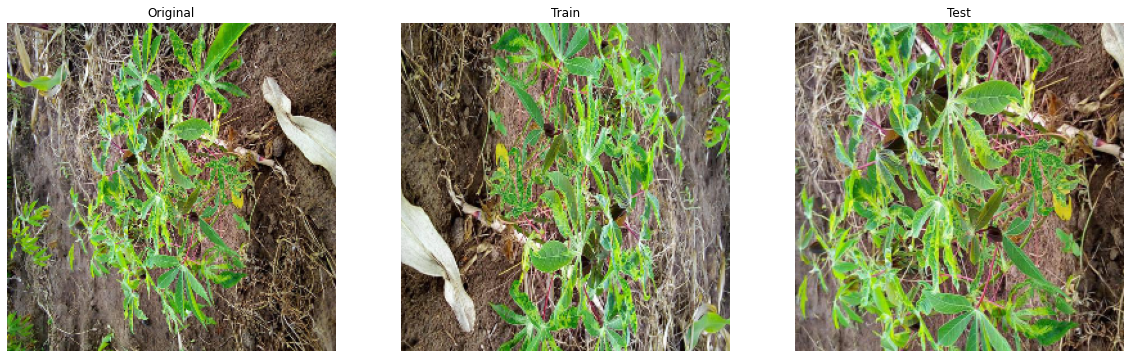

In [649]:
raw_image, label = raw_dataset[idx]
aug_image, _ = augmented_dataset[idx]
test_aug_image, _ = test_aug_dataset[idx]

print(label)
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plot_image(unnorm(raw_image))
plt.title('Original')
plt.subplot(1, 3, 2)
plot_image(unnorm(aug_image))
plt.title('Train')
plt.subplot(1, 3, 3)
plot_image(unnorm(test_aug_image))
plt.title('Test')
plt.show()

In [554]:
raw_image.shape, aug_image.shape, test_aug_image.shape

(torch.Size([3, 256, 256]),
 torch.Size([3, 256, 256]),
 torch.Size([3, 256, 256]))

In [151]:
raw_image

tensor([[[0.5008, 0.3305, 0.4452,  ..., 0.2903, 0.2528, 0.2256],
         [0.3434, 0.2957, 0.4861,  ..., 0.3219, 0.2762, 0.2511],
         [0.6206, 0.5640, 0.4385,  ..., 0.2368, 0.1951, 0.1639],
         ...,
         [0.2922, 0.2081, 0.1626,  ..., 0.1544, 0.1459, 0.1549],
         [0.3161, 0.2221, 0.1723,  ..., 0.1493, 0.1897, 0.1925],
         [0.2832, 0.2510, 0.2290,  ..., 0.1790, 0.2326, 0.1951]],

        [[0.4356, 0.2817, 0.4134,  ..., 0.4629, 0.4143, 0.3839],
         [0.3520, 0.3118, 0.5138,  ..., 0.4866, 0.4369, 0.4039],
         [0.6794, 0.6229, 0.4889,  ..., 0.3918, 0.3418, 0.3115],
         ...,
         [0.1670, 0.1077, 0.0841,  ..., 0.1845, 0.1856, 0.1951],
         [0.1908, 0.1216, 0.0939,  ..., 0.0859, 0.1379, 0.1461],
         [0.1580, 0.1505, 0.1506,  ..., 0.0707, 0.1362, 0.1010]],

        [[0.4622, 0.2627, 0.3434,  ..., 0.4607, 0.4240, 0.3943],
         [0.2957, 0.2182, 0.3829,  ..., 0.4708, 0.4210, 0.3841],
         [0.5654, 0.4865, 0.3438,  ..., 0.3553, 0.2901, 0.

In [56]:
aug_image

tensor([[[0.5496, 0.6012, 0.5449,  ..., 0.3179, 0.2889, 0.3422],
         [0.6227, 0.6360, 0.5932,  ..., 0.5032, 0.2763, 0.2192],
         [0.6354, 0.6461, 0.6124,  ..., 0.5283, 0.3190, 0.1951],
         ...,
         [0.5134, 0.5202, 0.5343,  ..., 0.1935, 0.1524, 0.1227],
         [0.5146, 0.5349, 0.5354,  ..., 0.2331, 0.2203, 0.2098],
         [0.5185, 0.5321, 0.5324,  ..., 0.2156, 0.2427, 0.2470]],

        [[0.6128, 0.6772, 0.6162,  ..., 0.4572, 0.3633, 0.4192],
         [0.6984, 0.7229, 0.6714,  ..., 0.6246, 0.3570, 0.2985],
         [0.7339, 0.7471, 0.7007,  ..., 0.6331, 0.3900, 0.2268],
         ...,
         [0.5917, 0.5949, 0.6088,  ..., 0.2097, 0.2217, 0.1628],
         [0.5930, 0.6096, 0.6101,  ..., 0.2849, 0.2594, 0.2170],
         [0.5973, 0.6069, 0.6074,  ..., 0.3150, 0.2656, 0.2363]],

        [[0.2506, 0.3601, 0.2786,  ..., 0.1906, 0.1468, 0.2194],
         [0.2956, 0.3066, 0.2530,  ..., 0.3962, 0.1329, 0.0889],
         [0.3251, 0.3184, 0.2972,  ..., 0.4433, 0.2397, 0.

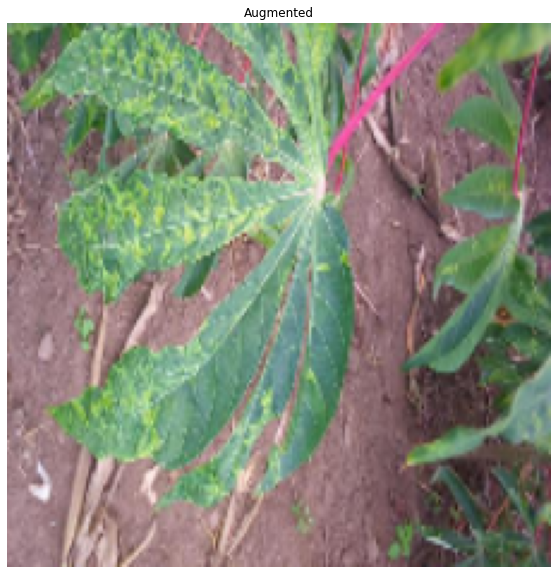

In [20]:
train_images_torch.transform = augs

random_idx = np.random.choice(range(len(train_images_torch)))

image, label = train_images_torch[random_idx]

plt.figure(figsize=(15, 10))
plot_image(unnorm(image))
plt.title('Augmented')
plt.show()